## RNN and LSTM Demo
The demo is to predict stock price.


In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step1:  Load data
df = pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
# convert date field from string to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
#Train Test Split in Sequential Data
len_data=len(df)
split_ratio=0.8
len_train=int(len_data*split_ratio)
len_validation=len_data-len_train
print(len_train)
print(len_validation)


1353
339


In [9]:
train_data=df[:len_train].iloc[:,:2] #stock open price and time only
train_data['Date']=pd.to_datetime(train_data['Date'])
train_data.info()
print(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1353 non-null   datetime64[ns]
 1   Open    1353 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.3 KB
           Date        Open
0    2010-06-29   19.000000
1    2010-06-30   25.790001
2    2010-07-01   25.000000
3    2010-07-02   23.000000
4    2010-07-06   20.000000
...         ...         ...
1348 2015-11-04  227.000000
1349 2015-11-05  230.580002
1350 2015-11-06  230.699997
1351 2015-11-09  232.990005
1352 2015-11-10  223.479996

[1353 rows x 2 columns]


In [10]:
validation_data=df[len_train:].iloc[:,:2] #stock open price and time only
validation_data['Date']=pd.to_datetime(validation_data['Date'])
validation_data.info()
print(validation_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 1353 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    339 non-null    datetime64[ns]
 1   Open    339 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB
           Date        Open
1353 2015-11-11  217.770004
1354 2015-11-12  217.850006
1355 2015-11-13  212.949997
1356 2015-11-16  206.089996
1357 2015-11-17  215.199997
...         ...         ...
1687 2017-03-13  244.820007
1688 2017-03-14  246.110001
1689 2017-03-15  257.000000
1690 2017-03-16  262.399994
1691 2017-03-17  264.000000

[339 rows x 2 columns]


In [11]:
# Converting to numpy array and removing header
train_set=train_data.values
validation_set=validation_data.values
print(train_set)

# Change shape of the data to 2D array
train_set=train_set[:,1].reshape(-1,1)
validation_set=validation_set[:,1].reshape(-1,1)
print(train_set)

[[Timestamp('2010-06-29 00:00:00') 19.0]
 [Timestamp('2010-06-30 00:00:00') 25.790001]
 [Timestamp('2010-07-01 00:00:00') 25.0]
 ...
 [Timestamp('2015-11-06 00:00:00') 230.699997]
 [Timestamp('2015-11-09 00:00:00') 232.990005]
 [Timestamp('2015-11-10 00:00:00') 223.479996]]
[[19.0]
 [25.790001]
 [25.0]
 ...
 [230.699997]
 [232.990005]
 [223.479996]]


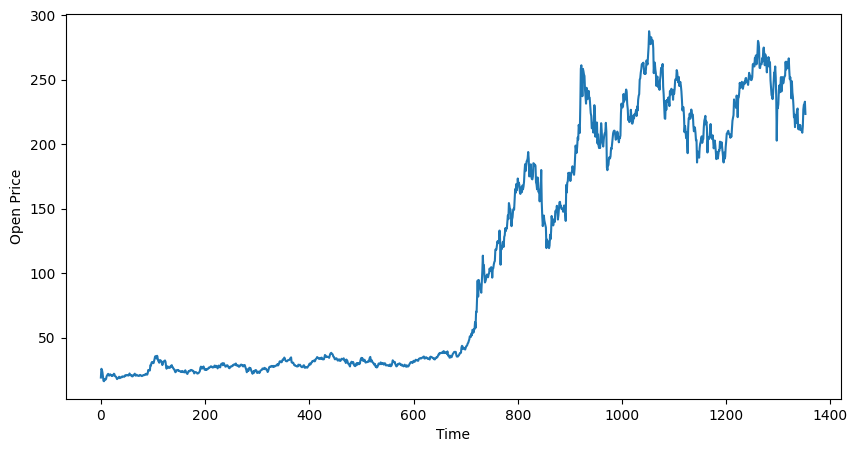

In [12]:
# Visualize the train set data
plt.figure(figsize=(10,5))
plt.plot(train_set)
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.show()

In [13]:
# Converting to x_train and y_train
x_train=[]
y_train=[]
for i in range(50,len_train):
  x_train.append(train_set[i-50:i,0])
  y_train.append(train_set[i,0])

# Convert it to numpy
x_train,y_train=np.array(x_train),np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1303, 50)
(1303,)


In [14]:
#Import Libraries
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [23]:
# Build RNN Model
model_1 = models.Sequential([
    layers.SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(x_train.shape[1],1)),
    layers.Dropout(0.2),

    layers.SimpleRNN(units=50, activation="tanh", return_sequences=True),
    layers.Dropout(0.2),

    layers.SimpleRNN(units=50, activation="tanh", return_sequences=True),
    layers.Dropout(0.2),

    layers.SimpleRNN(units=50, activation="tanh", return_sequences=True),
    layers.Dropout(0.2),

    layers.Dense(units=1,activation='tanh')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model_1.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [26]:
history_1=model_1.fit(x_train,y_train,epochs=20,batch_size=32)

ValueError: Invalid dtype: object